### Experiments exploration

In [41]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter,
                           MultiprocessingEvaluator, Policy, Scenario)

from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

from ema_workbench import (Model, )

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time

from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(5)

In [42]:
uncertainties = dike_model.uncertainties
levers = dike_model.levers 

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

In [43]:
base_case = Policy('Base Case', **{l.name:0 for l in dike_model.levers})

In [44]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=base_case)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [115]:
experiments.head()

A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                     20.0  176.861574       1.5   0.782335   54.822450   
1                    107.0   86.657001        10   0.458530  165.659710   
2                     83.0  112.308472        10   0.032869  109.701131   
3                      5.0  233.897977         1   0.831500  328.601395   
4                      5.0   34.374379         1   0.288434  188.771865   

  A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail    A.4_Bmax A.4_Brate  \
0         1   0.681229  314.030131        10   0.243310  301.688838       1.5   
1       1.5   0.289662   62.346406        10   0.525942   85.290859       1.5   
2        10   0.739737  279.768806        10   0.346580  119.511823        10   
3       1.5   0.982916  130.085453         1   0.191117  182.246184         1   
4       1.5   0.143154  144.839686         1   0.583672   95.512016         1   

   A.4_pfail    A.5_Bmax A.5_Brate  A.5_pfail discount rate 0 discount rate 1  \
0   0.060150  232.094790        10   0.270732             3.5             4.5   
1   0.374501  142.208264         1   0.382832             2.5             4.5   
2   0.234091  134.658115       1.5   0.379904             2.5             2.5   
3   0.902661  252.373164        10   0.735554             2.5             4.5   
4   0.042773  208.226712       1.5   0.453320             2.5             1.5   

  discount rate 2  0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  \
0             3.5      0.0      0.0      0.0      0.0      0.0      0.0   
1             1.5      0.0      0.0      0.0      0.0      0.0      0.0   
2             3.5      0.0      0.0      0.0      0.0      0.0      0.0   
3             3.5      0.0      0.0      0.0      0.0      0.0      0.0   
4             3.5      0.0      0.0      0.0      0.0      0.0      0.0   

   2_RfR 0  2_RfR 1  2_RfR 2  3_RfR 0  3_RfR 1  3_RfR 2  4_RfR 0  4_RfR 1  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   4_RfR 2  EWS_DaysToThreat  A.1_DikeIncrease 0  A.1_DikeIncrease 1  \
0      0.0               0.0                 0.0                 0.0   
1      0.0               0.0                 0.0                 0.0   
2      0.0               0.0                 0.0                 0.0   
3      0.0               0.0                 0.0                 0.0   
4      0.0               0.0                 0.0                 0.0   

   A.1_DikeIncrease 2  A.2_DikeIncrease 0  A.2_DikeIncrease 1  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   A.2_DikeIncrease 2  A.3_DikeIncrease 0  A.3_DikeIncrease 1  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   A.3_DikeIncrease 2  A.4_DikeIncrease 0  A.4_DikeIncrease 1  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   A.4_DikeIncrease 2  A.5_DikeIncrease 0  A.5_DikeIncreas

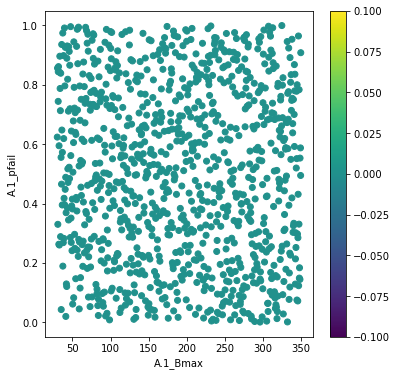

In [46]:
from ema_workbench.analysis import plotting, plotting_util

evac = outcomes['Expected Evacuation Costs 2']
maxEvac = evac

fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.1_Bmax'], experiments['A.1_pfail'], c=maxEvac)
plt.colorbar(sc)
ax.set_xlabel('A.1_Bmax')
ax.set_ylabel('A.1_pfail')
plt.show()

In [78]:
experiments.to_csv('Experiments_from_Exploration_1000scenarios_pf5.csv')

In [48]:
outcomes_DF = pd.DataFrame(outcomes)
outcomes_DF.to_csv('Outcomes_from_Exploration_1000scenarios_pf5.csv')

In [95]:
outcomes_load_DF = pd.read_csv('Outcomes_from_Exploration_1000scenarios_pf5.csv')
#adjust to the ones needed
outcomes_of_interest = outcomes_load_DF.iloc[:,::]

In [96]:
pd.set_option('display.max_columns', None)
outcomes_of_interest.head()

Unnamed: 0  A.1_Expected Annual Damage 0  A.1_Dike Investment Costs 0  \
0           0                  2.864968e+06                            0   
1           1                  1.552122e+08                            0   
2           2                  1.019891e+09                            0   
3           3                  0.000000e+00                            0   
4           4                  1.008722e+09                            0   

   A.1_Expected Number of Deaths 0  A.2_Expected Annual Damage 0  \
0                         0.002551                  1.224951e+07   
1                         0.103901                  7.038358e+07   
2                         0.649281                  0.000000e+00   
3                         0.000000                  2.028020e+06   
4                         0.640347                  1.456189e+08   

   A.2_Dike Investment Costs 0  A.2_Expected Number of Deaths 0  \
0                            0                         0.014384   
1                            0                         0.061568   
2                            0                         0.000000   
3                            0                         0.001955   
4                            0                         0.123812   

   A.3_Expected Annual Damage 0  A.3_Dike Investment Costs 0  \
0                  3.227622e+08                            0   
1                  0.000000e+00                            0   
2                  4.216252e+07                            0   
3                  4.012571e+08                            0   
4                  0.000000e+00                            0   

   A.3_Expected Number of Deaths 0  A.4_Expected Annual Damage 0  \
0                         0.674369                  3.399553e+07   
1                         0.000000                  7.488505e+06   
2                         0.071390                  5.699333e+06   
3                         0.664711                  0.000000e+00   
4                         0.000000                  2.642437e+07   

   A.4_Dike Investment Costs 0  A.4_Expected Number of Deaths 0  \
0                            0                         0.016105   
1                            0                         0.003300   
2                            0                         0.002453   
3                            0                         0.000000   
4                            0                         0.009470   

   A.5_Expected Annual Damage 0  A.5_Dike Investment Costs 0  \
0                           0.0                            0   
1                           0.0                            0   
2                           0.0                            0   
3                           0.0                            0   
4                           0.0                            0   

   A.5_Expected Number of Deaths 0  RfR Total Costs 0  \
0                              0.0                0.0   
1                              0.0                0.0   
2                              0.0                0.0   
3                              0.0                0.0   
4                              0.0                0.0   

   Expected Evacuation Costs 0  A.1_Expected Annual Damage 1  \
0                          0.0                  2.348873e+06   
1                          0.0                  1.013771e+08   
2                          0.0                  1.019891e+09   
3                          0.0                  0.000000e+00   
4                          0.0                  1.308308e+09   

   A.1_Dike Investment Costs 1  A.1_Expected Number of Deaths 1  \
0                            0                         0.002551   
1                            0                         0.103901   
2                            0                         0.649281   
3                            0                         0.000000   
4                            0                         0.640347   

   A.2_Expected Annua

In [103]:
outcomes_of_interest['RfR Total Costs'] = 0
outcomes_of_interest['Total Expected Evacuation Costs'] = 0

for i in range(3):
    outcomes_of_interest['RfR Total Costs'] += outcomes_of_interest[f'RfR Total Costs {i}']
    outcomes_of_interest['Total Expected Evacuation Costs'] += outcomes_of_interest[f'Expected Evacuation Costs {i}']

for n in range(1,6):
    outcomes_of_interest[f'A.{n}_Expected Total Damage'] = 0
    outcomes_of_interest[f'A.{n}_Total Dike Investment Costs'] = 0
    outcomes_of_interest[f'A.{n}_Total Expected Number of Deaths'] = 0
    
    for i in range(3):
        outcomes_of_interest[f'A.{n}_Expected Total Damage'] += outcomes_of_interest[f'A.{n}_Expected Number of Deaths {i}']
        outcomes_of_interest[f'A.{n}_Total Dike Investment Costs'] += outcomes_of_interest[f'A.{n}_Dike Investment Costs {i}']
        outcomes_of_interest[f'A.{n}_Total Expected Number of Deaths'] += outcomes_of_interest[f'A.{n}_Expected Number of Deaths {i}']
    n+=1

outcomes_totals = outcomes_of_interest.iloc[:,-17::]

In [104]:
outcomes_totals.head()

RfR Total Costs  Total Expected Evacuation Costs  \
0              0.0                              0.0   
1              0.0                              0.0   
2              0.0                              0.0   
3              0.0                              0.0   
4              0.0                              0.0   

   A.1_Expected Total Damage  A.1_Total Dike Investment Costs  \
0                   0.007652                                0   
1                   0.311703                                0   
2                   1.947844                                0   
3                   0.000000                                0   
4                   1.921042                                0   

   A.1_Total Expected Number of Deaths  A.2_Expected Total Damage  \
0                             0.007652                   0.043151   
1                             0.311703                   0.184703   
2                             1.947844                   0.000000   
3                             0.000000                   0.005865   
4                             1.921042                   0.371435   

   A.2_Total Dike Investment Costs  A.2_Total Expected Number of Deaths  \
0                                0                             0.043151   
1                                0                             0.184703   
2                                0                             0.000000   
3                                0                             0.005865   
4                                0                             0.371435   

   A.3_Expected Total Damage  A.3_Total Dike Investment Costs  \
0                   2.023107                                0   
1                   0.000000                                0   
2                   0.214169                                0   
3                   1.994133                                0   
4                   0.000000                                0   

   A.3_Total Expected Number of Deaths  A.4_Expected Total Damage  \
0                             2.023107                   0.048316   
1                             0.000000                   0.009899   
2                             0.214169                   0.007359   
3                             1.994133                   0.000000   
4                             0.000000                   0.028411   

   A.4_Total Dike Investment Costs  A.4_Total Expected Number of Deaths  \
0                                0                             0.048316   
1                                0                             0.009899   
2                                0                             0.007359   
3                                0                             0.000000   
4                                0                             0.028411   

   A.5_Expected Total Damage  A.5_Total Dike Investment Costs  \
0                        0.0                                0   
1                        0.0                                0   
2                        0.0                                0   
3                        0.0                                0   
4                        0.0                                0   

   A.5_Total Expected Number of Deaths  
0                                  0.0  
1                                  0.0  
2                                  0.0  
3                                  0.0  
4                                  0.0

In [106]:
outcomes_totals.to_csv('Outcomes_totals_from_Exploration_1000scenarios_pf5.csv')

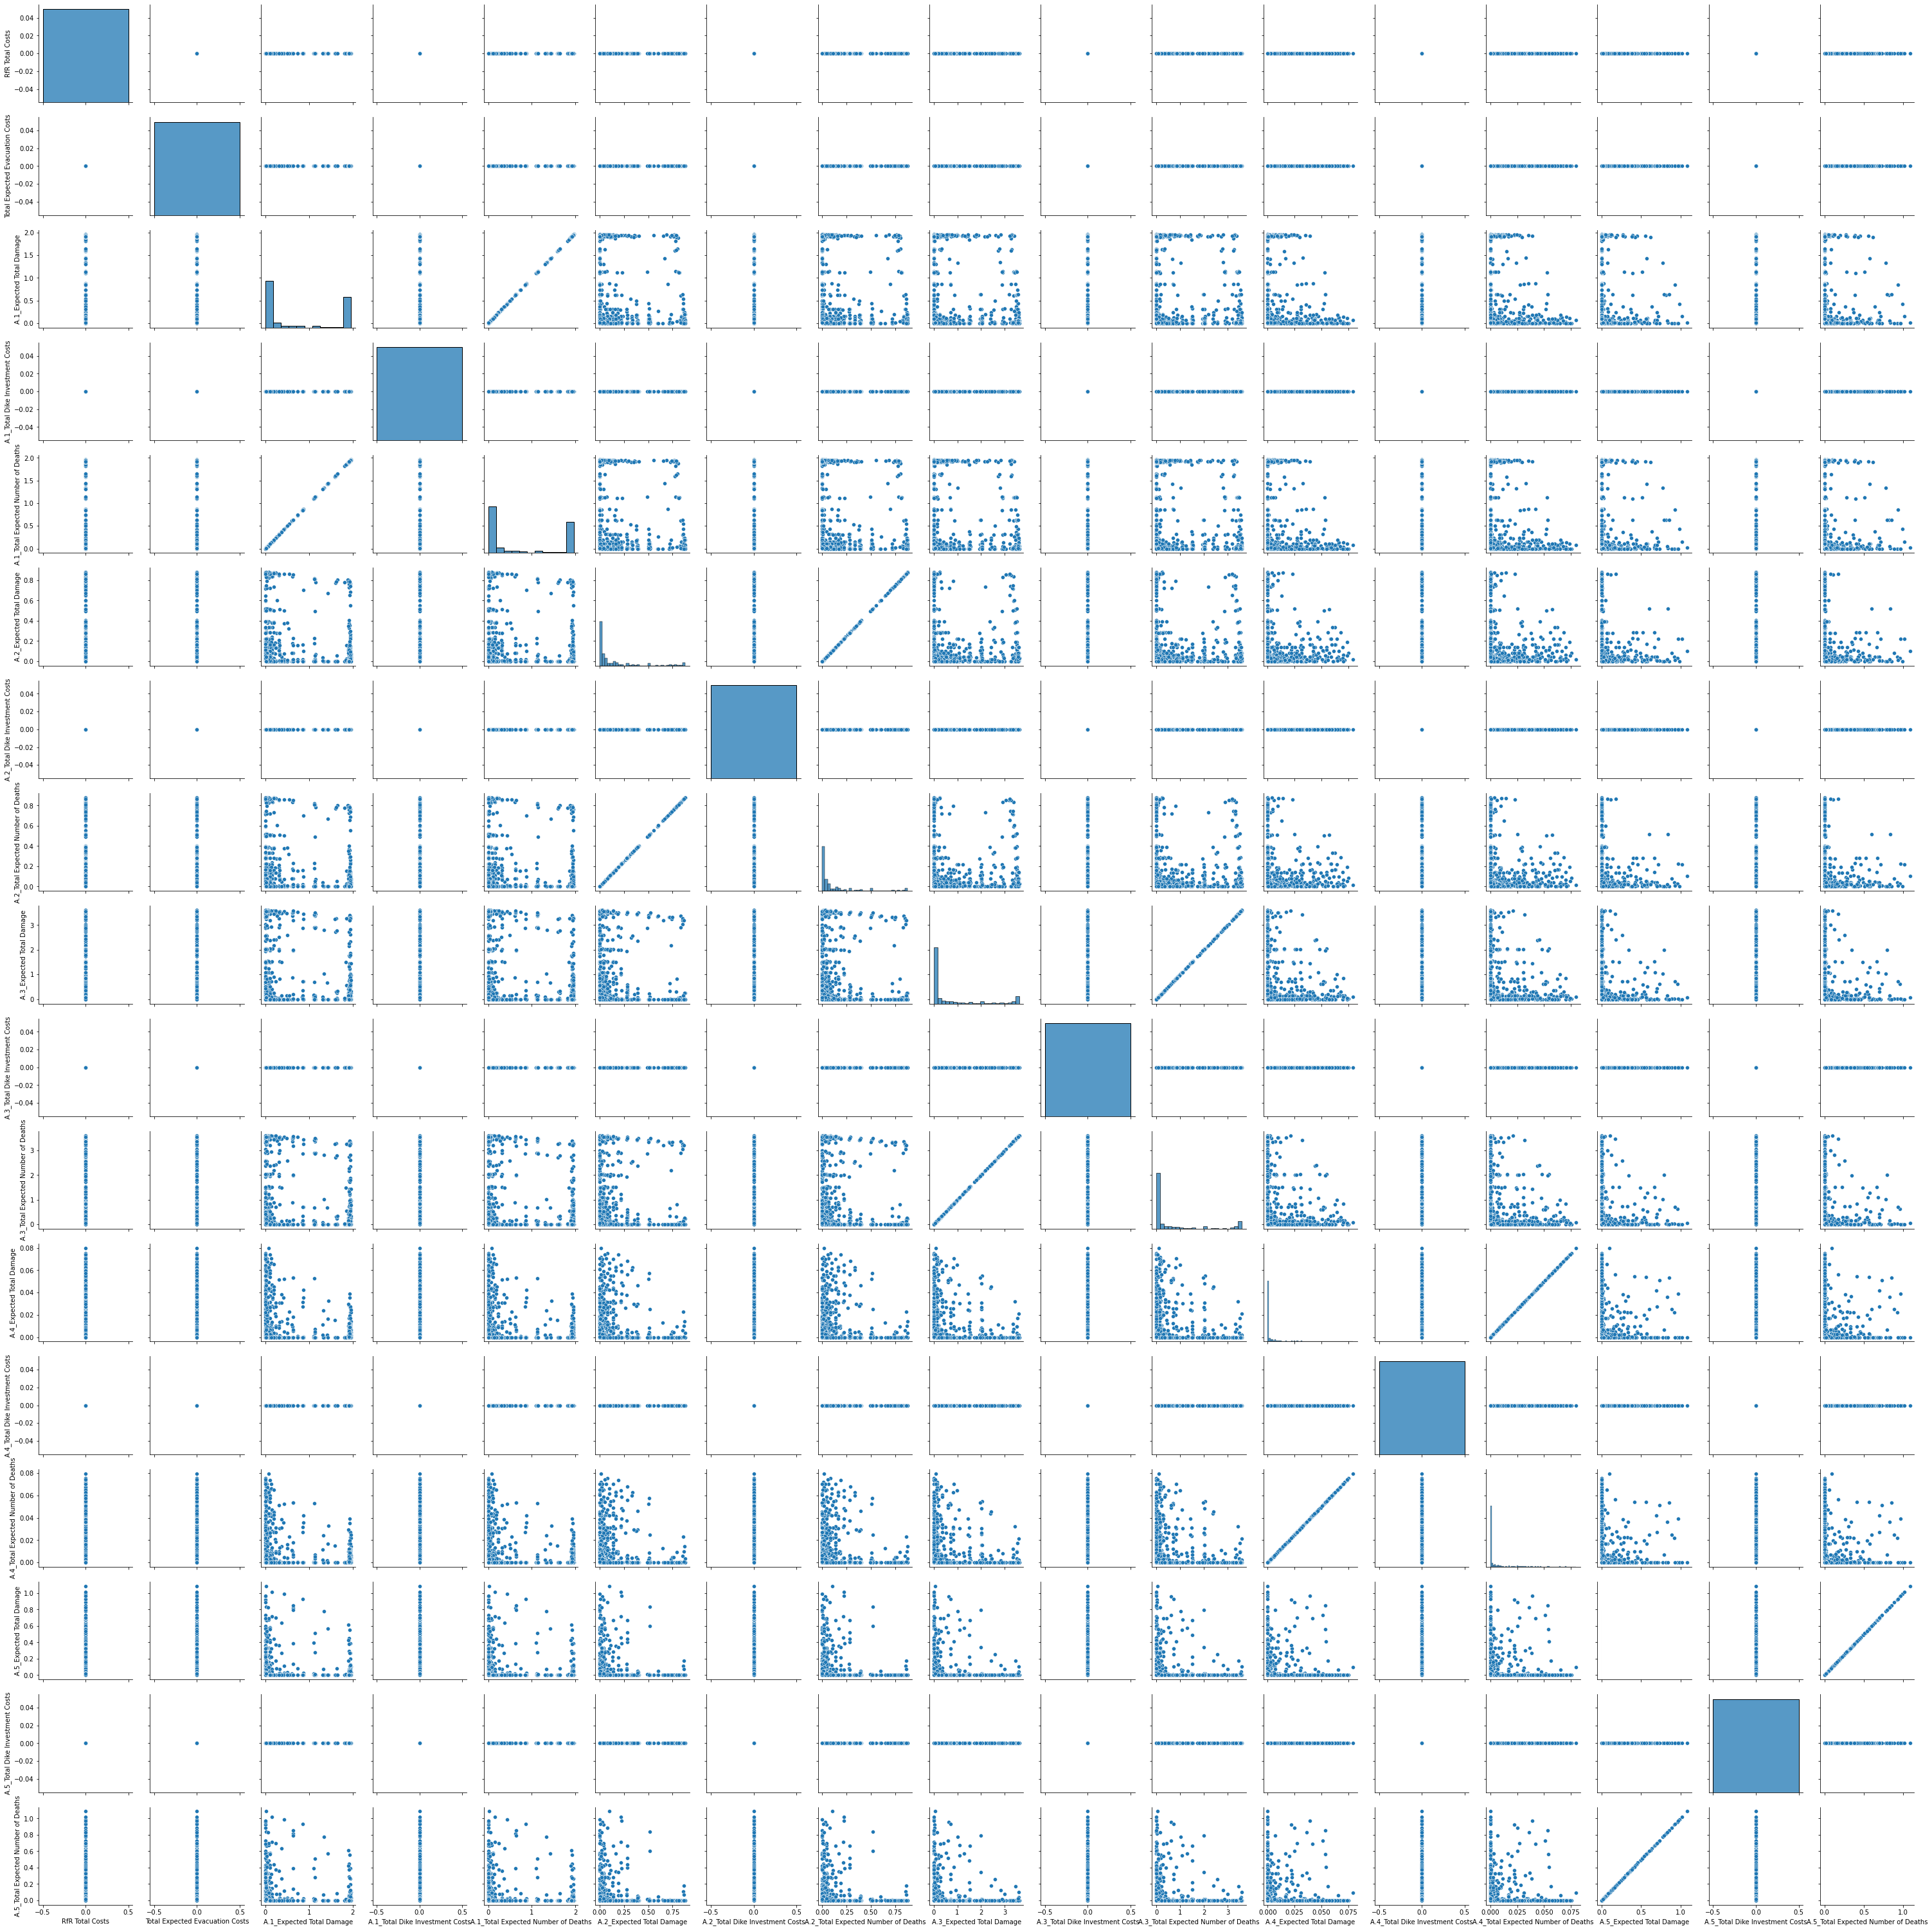

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

pair_plot = sns.pairplot(outcomes_totals, vars=list(outcomes_totals.keys()))

In [114]:
pair_plot.savefig('pairplot.png')

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because on

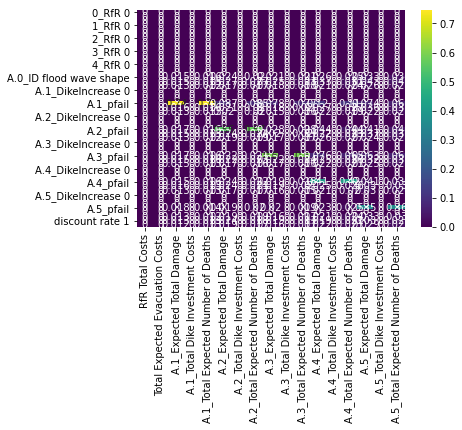

In [108]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes_totals

fs = feature_scoring.get_feature_scores_all(x, y)


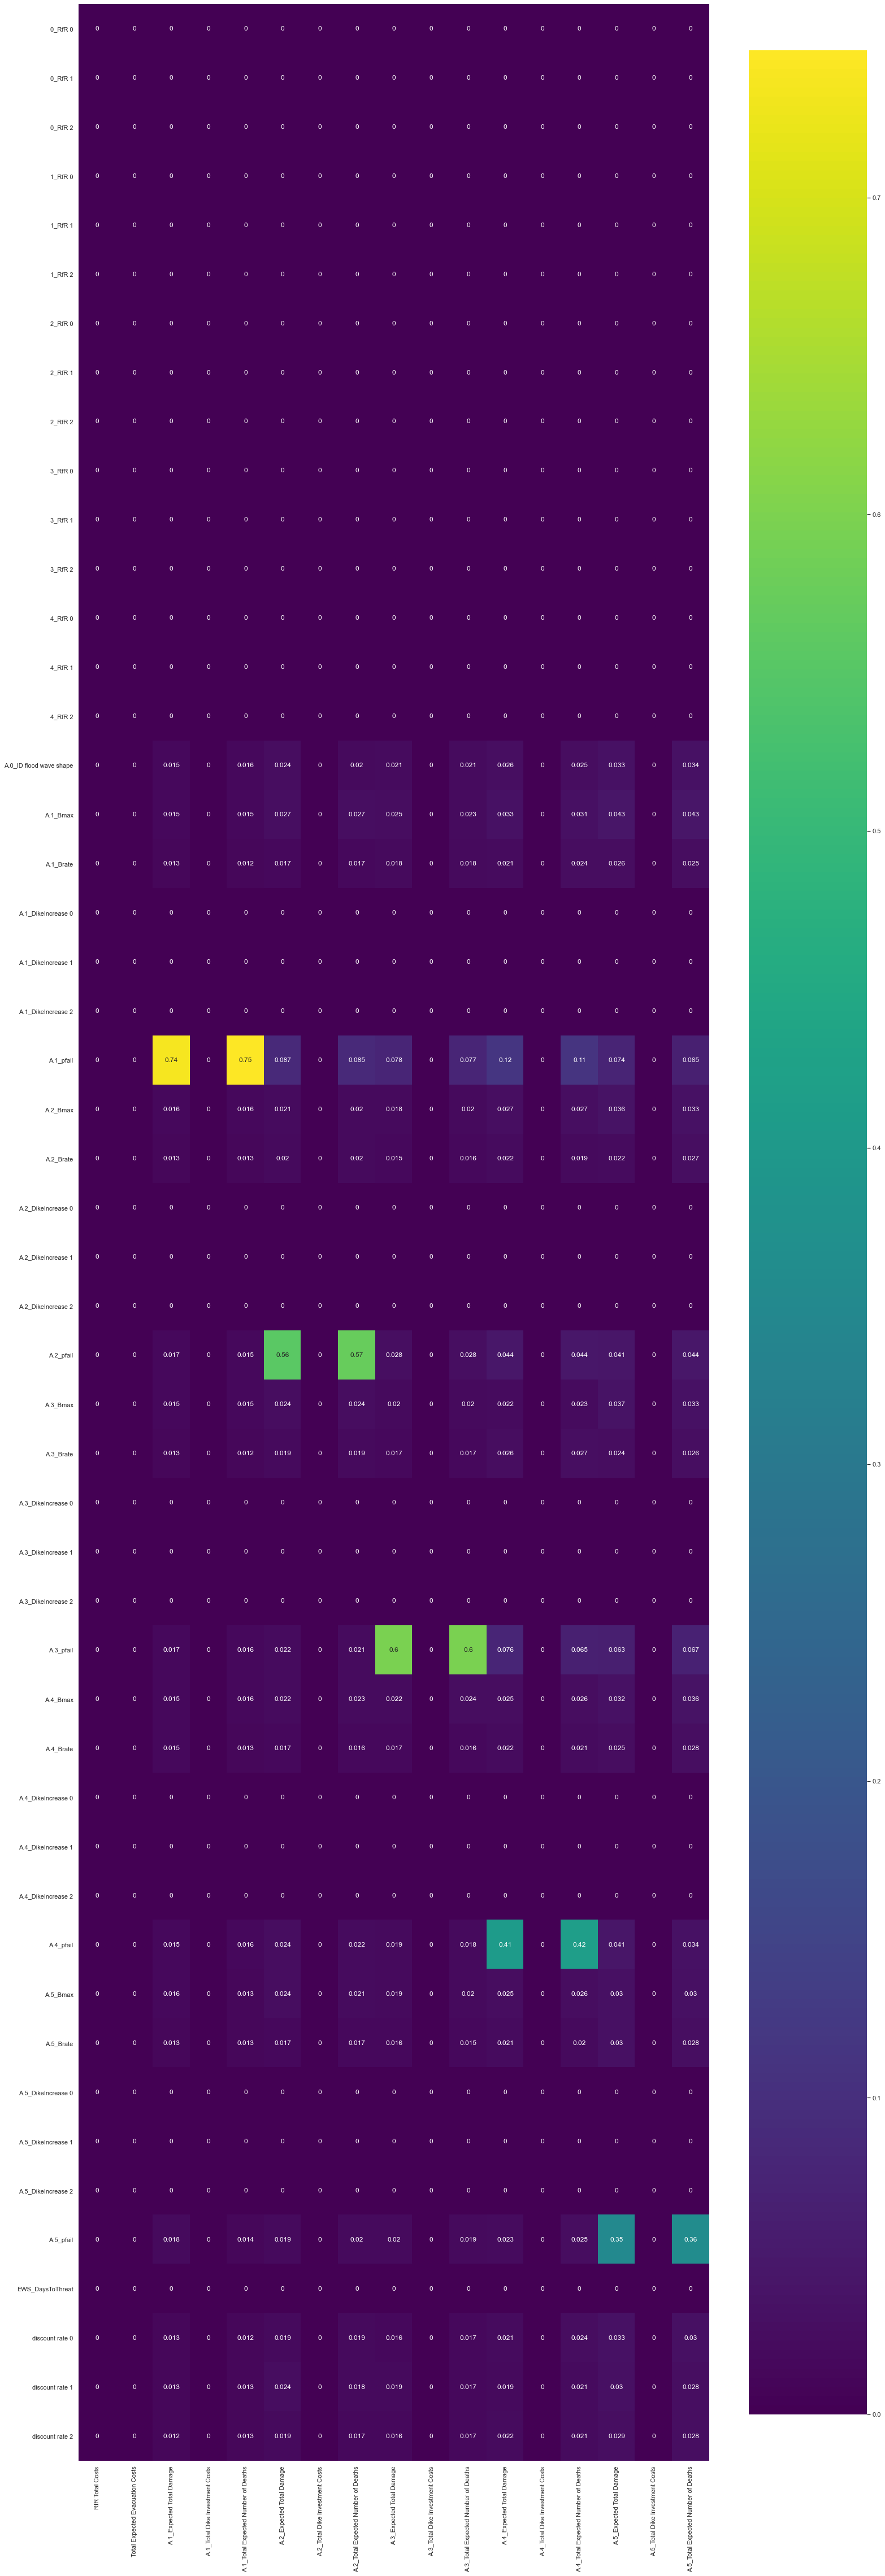

In [120]:
sns.set(rc = {'figure.figsize':(25,80)})
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

In [116]:
x

A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                       20.0  176.861574       1.5   0.782335   54.822450   
1                      107.0   86.657001        10   0.458530  165.659710   
2                       83.0  112.308472        10   0.032869  109.701131   
3                        5.0  233.897977         1   0.831500  328.601395   
4                        5.0   34.374379         1   0.288434  188.771865   
5                       43.0   64.651425       1.5   0.876613   32.149205   
6                      110.0  150.276439        10   0.322493  286.419087   
7                       21.0  227.973930        10   0.988974  300.958720   
8                       36.0  320.750473        10   0.408488   34.134804   
9                       19.0  290.807702        10   0.255435  341.287044   
10                     130.0  228.443832       1.5   0.895603  347.948860   
11                      31.0  324.529259         1   0.661557  195.503926   
12                      47.0   68.335641       1.5   0.366224  103.552065   
13                      23.0  235.965360        10   0.451284   35.183497   
14                      70.0   45.653595       1.5   0.522190  346.075208   
15                      75.0  140.738528        10   0.089494  206.438545   
16                     108.0   40.444363        10   0.447841  298.135963   
17                      40.0  349.539242       1.5   0.494497  320.743269   
18                      85.0  300.877395        10   0.332500  189.601579   
19                      73.0  239.103417       1.5   0.338455  126.760524   
20                      82.0  165.086135        10   0.506815  195.308764   
21                      10.0  108.991387        10   0.864991   62.448508   
22                      56.0   97.733000         1   0.933588  337.296493   
23                      60.0  229.939338       1.5   0.875096  254.558802   
24                      92.0  296.227643       1.5   0.000584  337.860907   
25                      50.0   96.278446         1   0.217168  309.201192   
26                      37.0   42.439540        10   0.120436   59.429177   
27                      41.0  113.984750       1.5   0.047571   42.254967   
28                     127.0  239.905152        10   0.275542  194.319904   
29                      82.0   93.535694        10   0.021008  235.700448   
30                      58.0  304.546249         1   0.423200   95.387243   
31                      75.0  345.374701       1.5   0.297355  272.993559   
32                     120.0  104.147174        10   0.174929   61.877606   
33                     131.0  112.961099         1   0.376351   66.036077   
34                      82.0  208.168920         1   0.525242  306.575109   
35                      24.0   83.274235         1   0.056085  120.733029   
36                      31.0  316.550719         1   0.578050  181.450152   
37                      55.0  137.091024       1.5   0.353344  194.103829   
38                      69.0  212.177959        10   0.904098  219.121856   
39                      46.0   30.387949        10   0.856267   86.636918   
40                     128.0  265.145622        10   0.421214  308.114111   
41                      67.0   77.362600        10   0.888955   79.897980   
42                     106.0   51.424224         1   0.605345  286.735573   
43                      83.0  154.530974       1.5   0.041903  243.399401   
44                     129.0  339.151761       1.5   0.669139  325.949175   
45                      32.0  235.531512        10   0.403267  258.282389   
46                      77.0  156.961195       1.5   0.562920  194.924048   
47                      94.0  132.337326         1   0.495331  118.957174   
48                      19.0   71.282342        10   0.220526  217.805884   
49                      54.0  261.777939         1   0.512705  179.135546   
50                      93.0  324.121726       1.5   0.239598  133.245339   
5